In [3]:
# I start with some useful libraries

import os
import pandas as pd
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator

In [4]:
#this are the rmsm files you want to check

path_dir: str = r"/home/svergani/monitoring/hdf5_created_files"
target_0 = h5.File(os.sep.join([path_dir, "rmsm_display_0_2022_05_22.hdf5"]), 'r')
target_1 = h5.File(os.sep.join([path_dir, "rmsm_display_1_2022_05_22.hdf5"]), 'r')
target_2 = h5.File(os.sep.join([path_dir, "rmsm_display_2_2022_05_22.hdf5"]), 'r')
target_0_rms = h5.File(os.sep.join([path_dir, "rms_display_0_2022_05_22.hdf5"]), 'r')
target_1_rms = h5.File(os.sep.join([path_dir, "rms_display_1_2022_05_22.hdf5"]), 'r')
target_2_rms = h5.File(os.sep.join([path_dir, "rms_display_2_2022_05_22.hdf5"]), 'r')

In [3]:
#this is the file containing the baselines

baselines = h5.File(os.sep.join([path_dir, "baselines_2022_05_22.hdf5"]), 'r')

In [4]:
#I extract data from files and baseline

#rmsm over time from file
rmsm_0 = np.array(target_0.get('rmsm').value)
rmsm_1 = np.array(target_1.get('rmsm').value)
rmsm_2 = np.array(target_2.get('rmsm').value)
#channel numbers from file
channels_0 = np.array(target_0.get('channels').value)
channels_1 = np.array(target_1.get('channels').value)
channels_2 = np.array(target_2.get('channels').value)
#baselines per channel
bl_0_array = np.array(baselines.get('mean_display_0').value)
bl_1_array = np.array(baselines.get('mean_display_1').value)
bl_2_array = np.array(baselines.get('mean_display_2').value)
#baseline from display (single number)
bl_0_total = baselines.get('total_mean_0').value
bl_1_total = baselines.get('total_mean_1').value
bl_2_total = baselines.get('total_mean_2').value
#channel numbers from baselines
channels_bl_0 = baselines.get('channels_bl_0').value
channels_bl_1 = baselines.get('channels_bl_1').value
channels_bl_2 = baselines.get('channels_bl_2').value

In [5]:
#first thing to check
#each baseline file must have the same number of channel of the file you are checking
#if not, it means you are comparing the wrong display and it will raise an error

equal_arrays_0 = (channels_0 == channels_bl_0).all()
equal_arrays_1 = (channels_1 == channels_bl_1).all()
equal_arrays_2 = (channels_2 == channels_bl_2).all()

if(equal_arrays_0==True and equal_arrays_1==True and equal_arrays_2==True):
    print("The displays you are using have the same structures of the baselines. all good!")
else:
    print("Error! you are not using the right baseline!")
    if(equal_arrays_0==False):
        print("Display 0 is wrong!")
    if(equal_arrays_1==False):
        print("Display 1 is wrong!")
    if(equal_arrays_2==False):
        print("Display 2 is wrong!")

The displays you are using have the same structures of the baselines. all good!


In [6]:
time_0 = np.arange(rmsm_0.shape[0])*10
time_1 = np.arange(rmsm_1.shape[0])*10
time_2 = np.arange(rmsm_2.shape[0])*10

In [7]:
#very important parameter: how far from the average must a pixel be to be called "faulty"?
#remember that 1 sigma is roughly 34.1 %

threshold = 0.68

In [8]:
#If a value in the rmsm for a given channel is more than 35% far from the average,
#which is roughly one sigma
# AND this happens in two subsequent pixels, then ring the bell
faulty_0 = []
channel_0_alarms = []
channel_0_perc = []

for i in range(rmsm_0.shape[1]):#channels
    temp_0 = []
    temp_perc_0 = []
    for j in range(rmsm_0.shape[0]):#measurements
        temp_perc_0.append((rmsm_0[j][i]-bl_0_array[i])/bl_0_array[i])
        if((abs(rmsm_0[j][i]-bl_0_array[i])/bl_0_array[i])>threshold):
            temp_0.append(rmsm_0[j][i])
        else:
            temp_0.append(-999)
    channel_0_alarms.append(temp_0)
    channel_0_perc.append(temp_perc_0)

channel_0_alarms= np.array(channel_0_alarms)
channel_0_perc= np.array(channel_0_perc)

del temp_0
del temp_perc_0
    
for i in range(channel_0_alarms.shape[0]):#channels
    temp_0 = []
    for j in range(channel_0_alarms.shape[1]):#measurements
        if(j<(channel_0_alarms.shape[1]-1) and channel_0_alarms[i][j]!=-999 and channel_0_alarms[i][j+1]!=-999):
            percentage=round((channel_0_alarms[i][j]-bl_0_array[i])/bl_0_array[i],2)
            temp_0.append(1)
            #I am commenting out the next print only because github gets a bit crazy, but use it when running it!
            #print("alarm! In channel",i,"at time",time_0[j],"we had a value",percentage," away from mean and this happened in two subsequent pixels")
        else:
            temp_0.append(0.1)
    faulty_0.append(temp_0)
del temp_0
faulty_0 = np.array(faulty_0)

In [9]:
channel_1_alarms = []
faulty_1 = []
channel_1_perc = []

for i in range(rmsm_1.shape[1]):#channels
    temp_1 = []
    temp_perc_1 = []
    for j in range(rmsm_1.shape[0]):#measurements
        temp_perc_1.append((rmsm_1[j][i]-bl_1_array[i])/bl_1_array[i])
        if((abs(rmsm_1[j][i]-bl_1_array[i])/bl_1_array[i])>threshold):
            temp_1.append(rmsm_1[j][i])
        else:
            temp_1.append(-999)
    channel_1_alarms.append(temp_1)
    channel_1_perc.append(temp_perc_1)

channel_1_alarms= np.array(channel_1_alarms)
channel_1_perc= np.array(channel_1_perc)

del temp_1
del temp_perc_1

for i in range(channel_1_alarms.shape[0]):#channels
    temp_1 = []
    for j in range(channel_1_alarms.shape[1]):#measurements
        if(j<(channel_1_alarms.shape[1]-1) and channel_1_alarms[i][j]!=-999 and channel_1_alarms[i][j+1]!=-999):
            percentage=round((channel_1_alarms[i][j]-bl_1_array[i])/bl_1_array[i],2)
            temp_1.append(1)
            #print("alarm! In channel",i,"at time",time_1[j],"we had a value",percentage," away from mean and this happened in two subsequent pixels")
        else:
            temp_1.append(0.1)
    faulty_1.append(temp_1)
del temp_1
faulty_1 = np.array(faulty_1)

In [10]:
faulty_2 = []
channel_2_alarms = []
channel_2_perc = []

for i in range(rmsm_2.shape[1]):#channels
    temp_2 = []
    temp_perc_2 = []
    for j in range(rmsm_2.shape[0]):#measurements
        temp_perc_2.append((rmsm_2[j][i]-bl_2_array[i])/bl_2_array[i])
        if((abs(rmsm_2[j][i]-bl_2_array[i])/bl_2_array[i])>threshold):
            temp_2.append(rmsm_2[j][i])
        else:
            temp_2.append(-999)
    channel_2_alarms.append(temp_2)
    channel_2_perc.append(temp_perc_2)

channel_2_alarms= np.array(channel_2_alarms)
channel_2_perc= np.array(channel_2_perc)

del temp_2
del temp_perc_2
    
for i in range(channel_2_alarms.shape[0]):#channels
    temp_2 = []
    for j in range(channel_2_alarms.shape[1]):#measurements
        if(j<(channel_2_alarms.shape[1]-1) and channel_2_alarms[i][j]!=-999 and channel_2_alarms[i][j+1]!=-999):
            percentage=round((channel_2_alarms[i][j]-bl_2_array[i])/bl_2_array[i],2)
            temp_2.append(1)
            #print("alarm! In channel",i,"at time",time_2[j],"we had a value",percentage," away from mean and this happened in two subsequent pixels")
        else:
            temp_2.append(0.1)
    faulty_2.append(temp_2)
del temp_2
faulty_2 = np.array(faulty_2)

In [11]:
#this is my way to create the channels to be plotted on the 3d plot
#problem is, it will show a hole in the detector
channels_3d_0 = []
for i in range(channels_0.size):
    channels_3d_0.append(np.ones(time_0.size,dtype=int)*channels_0[i])
channels_3d_0 = np.array(channels_3d_0)

channels_3d_1 = []
for i in range(channels_1.size):
    channels_3d_1.append(np.ones(time_1.size,dtype=int)*channels_1[i])
channels_3d_1 = np.array(channels_3d_1)

channels_3d_2 = []
for i in range(channels_2.size):
    channels_3d_2.append(np.ones(time_2.size,dtype=int)*channels_2[i])
channels_3d_2 = np.array(channels_3d_2)

In [12]:
#this is my way to create the channels to be plotted on the 3d plot
#this will loose the information about the channel number
#but no hole

channels_3d_0 = []
for i in range(channels_0.size):
    channels_3d_0.append(np.ones(time_0.size,dtype=int)*i)
channels_3d_0 = np.array(channels_3d_0)

channels_3d_1 = []
for i in range(channels_1.size):
    channels_3d_1.append(np.ones(time_1.size,dtype=int)*i)
channels_3d_1 = np.array(channels_3d_1)

channels_3d_2 = []
for i in range(channels_2.size):
    channels_3d_2.append(np.ones(time_2.size,dtype=int)*i)
channels_3d_2 = np.array(channels_3d_2)

In [13]:
#Set default figure size
mpl.rcParams['figure.figsize'] = [30, 20]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

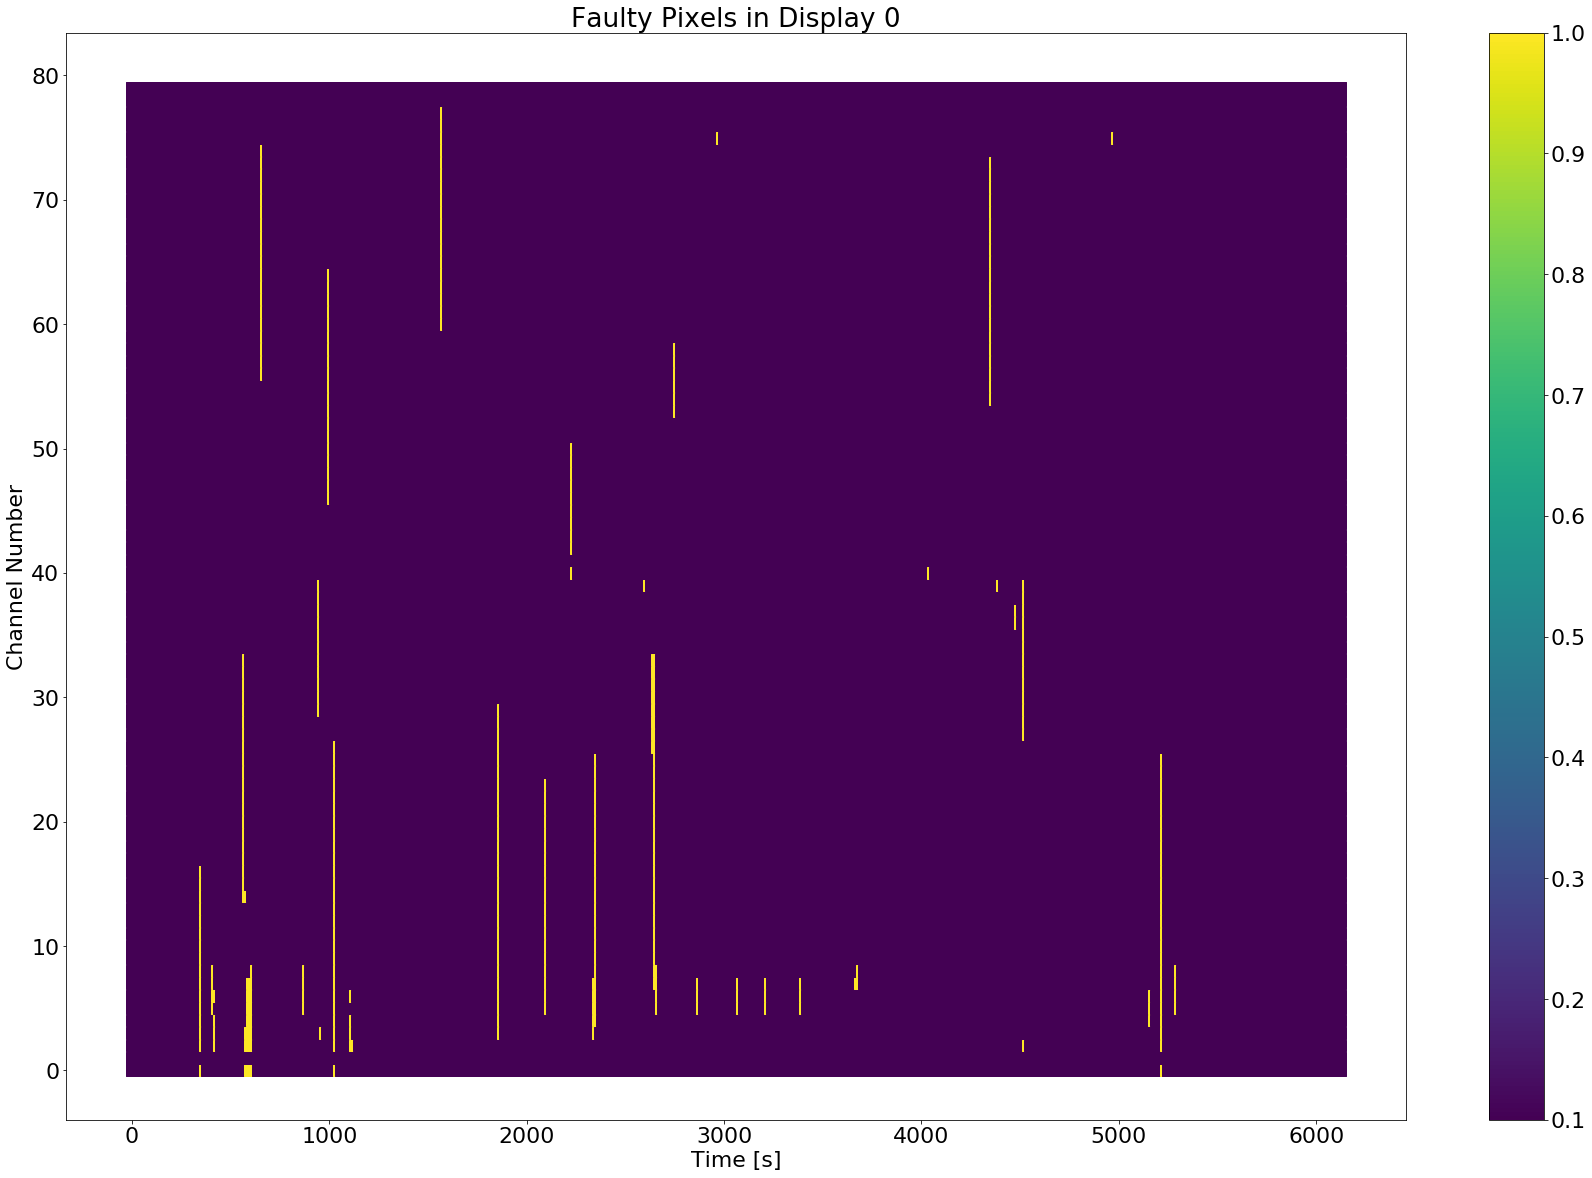

In [14]:
fig, ax = plt.subplots()
for i in range(faulty_0.shape[0]):
    sc=ax.scatter(time_0,channels_3d_0[i,:], c=faulty_0[i,:],vmin=0.1, vmax=1,marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=0.1, vmax=1)                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Faulty Pixels in Display 0")
plt.show()

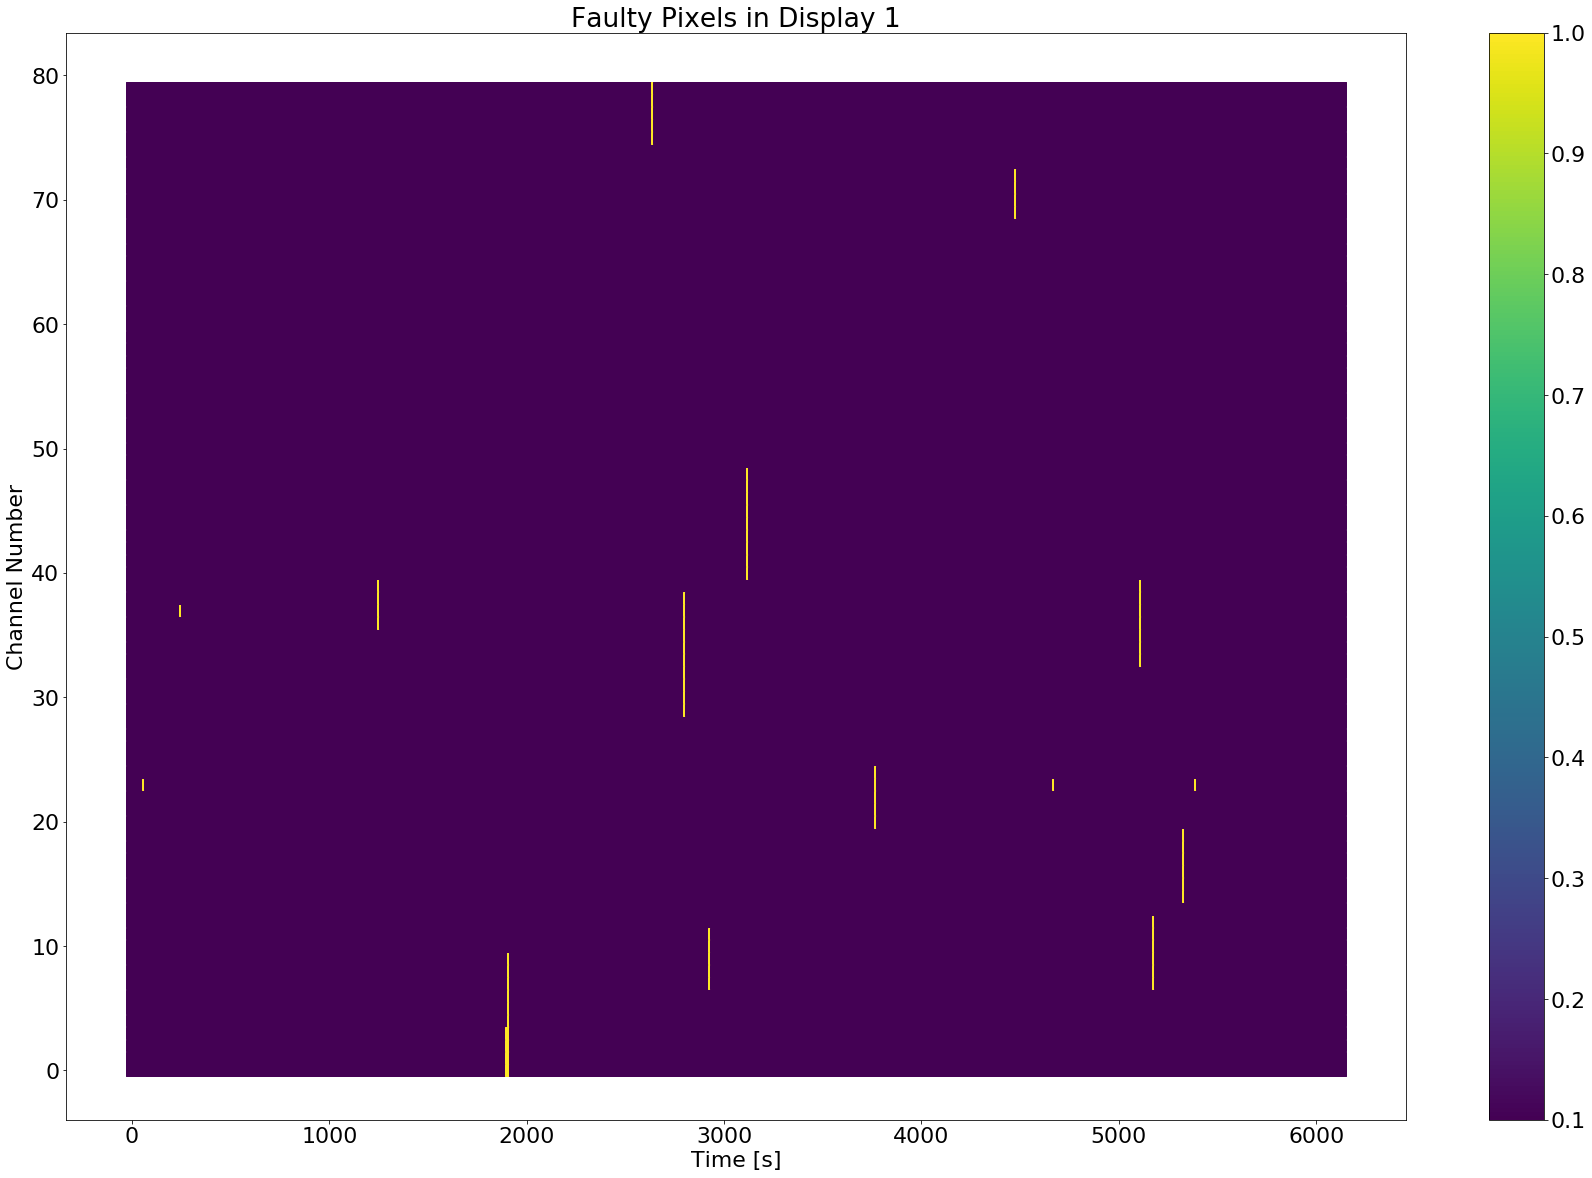

In [15]:
fig, ax = plt.subplots()
for i in range(faulty_1.shape[0]):
    sc=ax.scatter(time_1,channels_3d_1[i,:], c=faulty_1[i,:],vmin=0.1, vmax=1,marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=0.1, vmax=1)                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Faulty Pixels in Display 1")
plt.show()

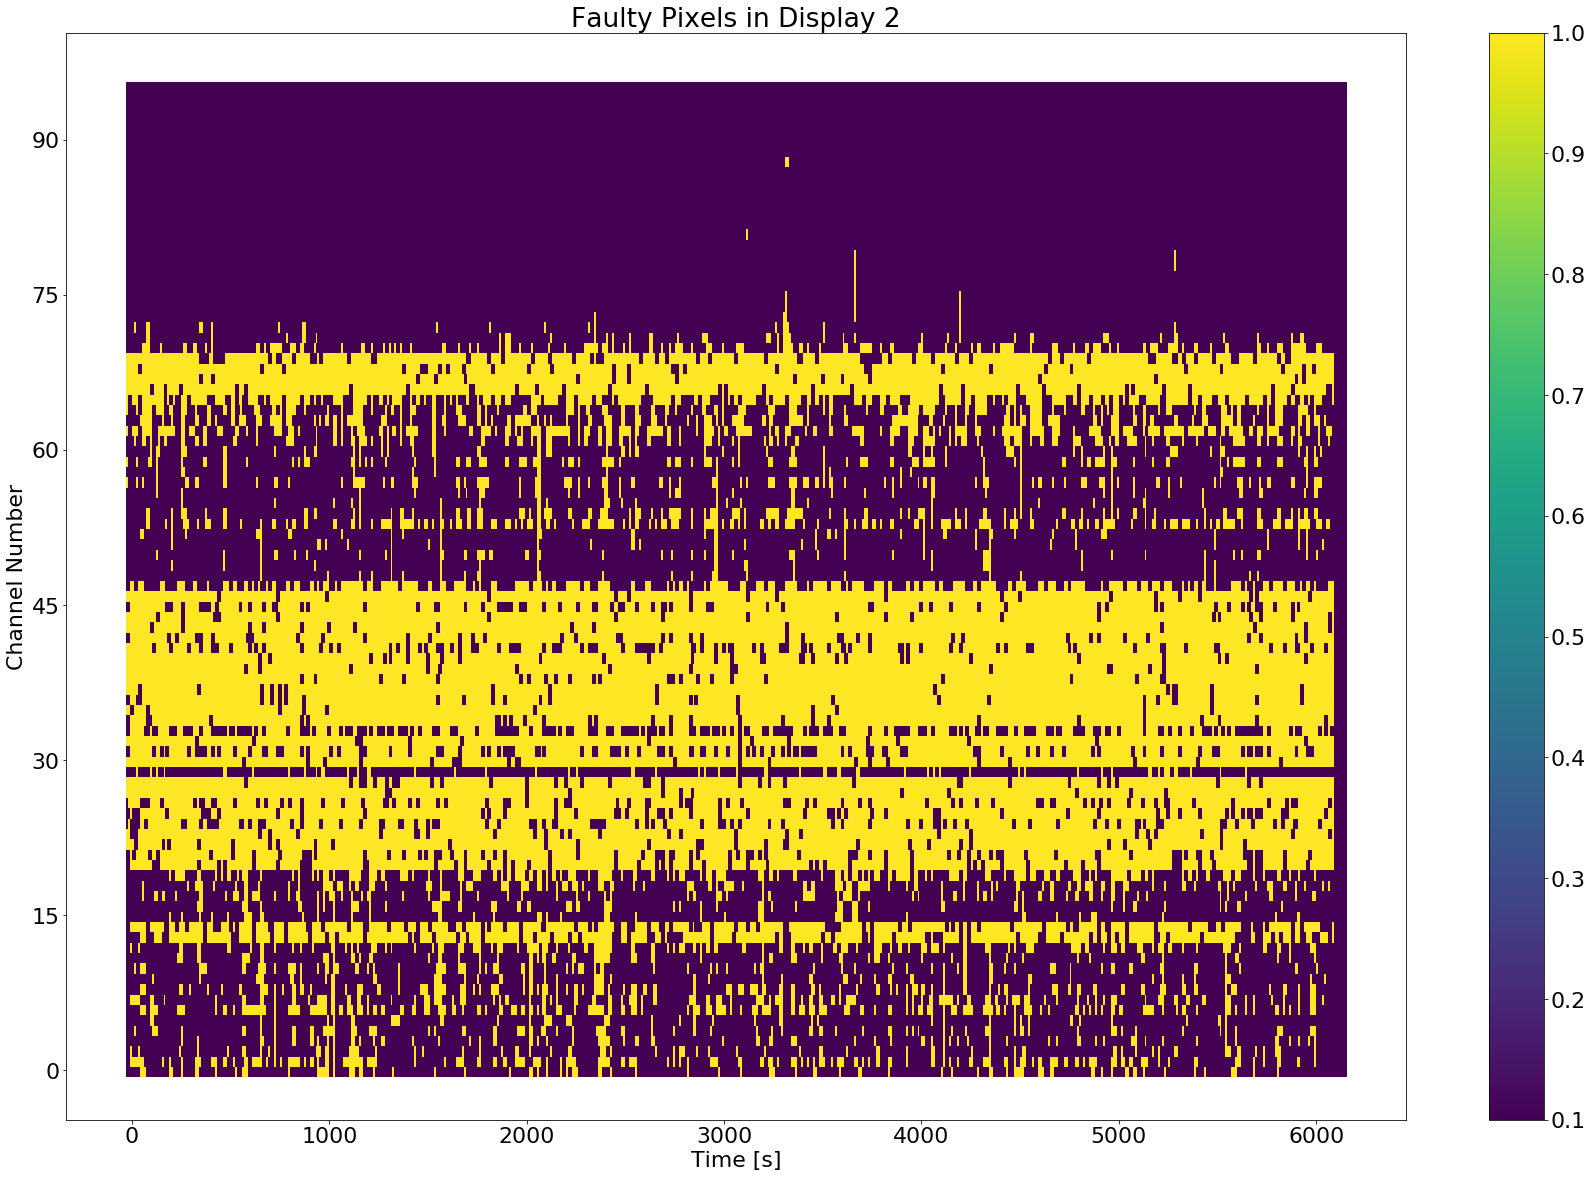

In [16]:
fig, ax = plt.subplots()
for i in range(faulty_2.shape[0]):
    sc=ax.scatter(time_2,channels_3d_2[i,:], c=faulty_2[i,:],vmin=0.1, vmax=1,marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=0.1, vmax=1)                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Faulty Pixels in Display 2")
plt.show()

In [ ]:
#now plot the percentage of each pixel with respect to the baseline

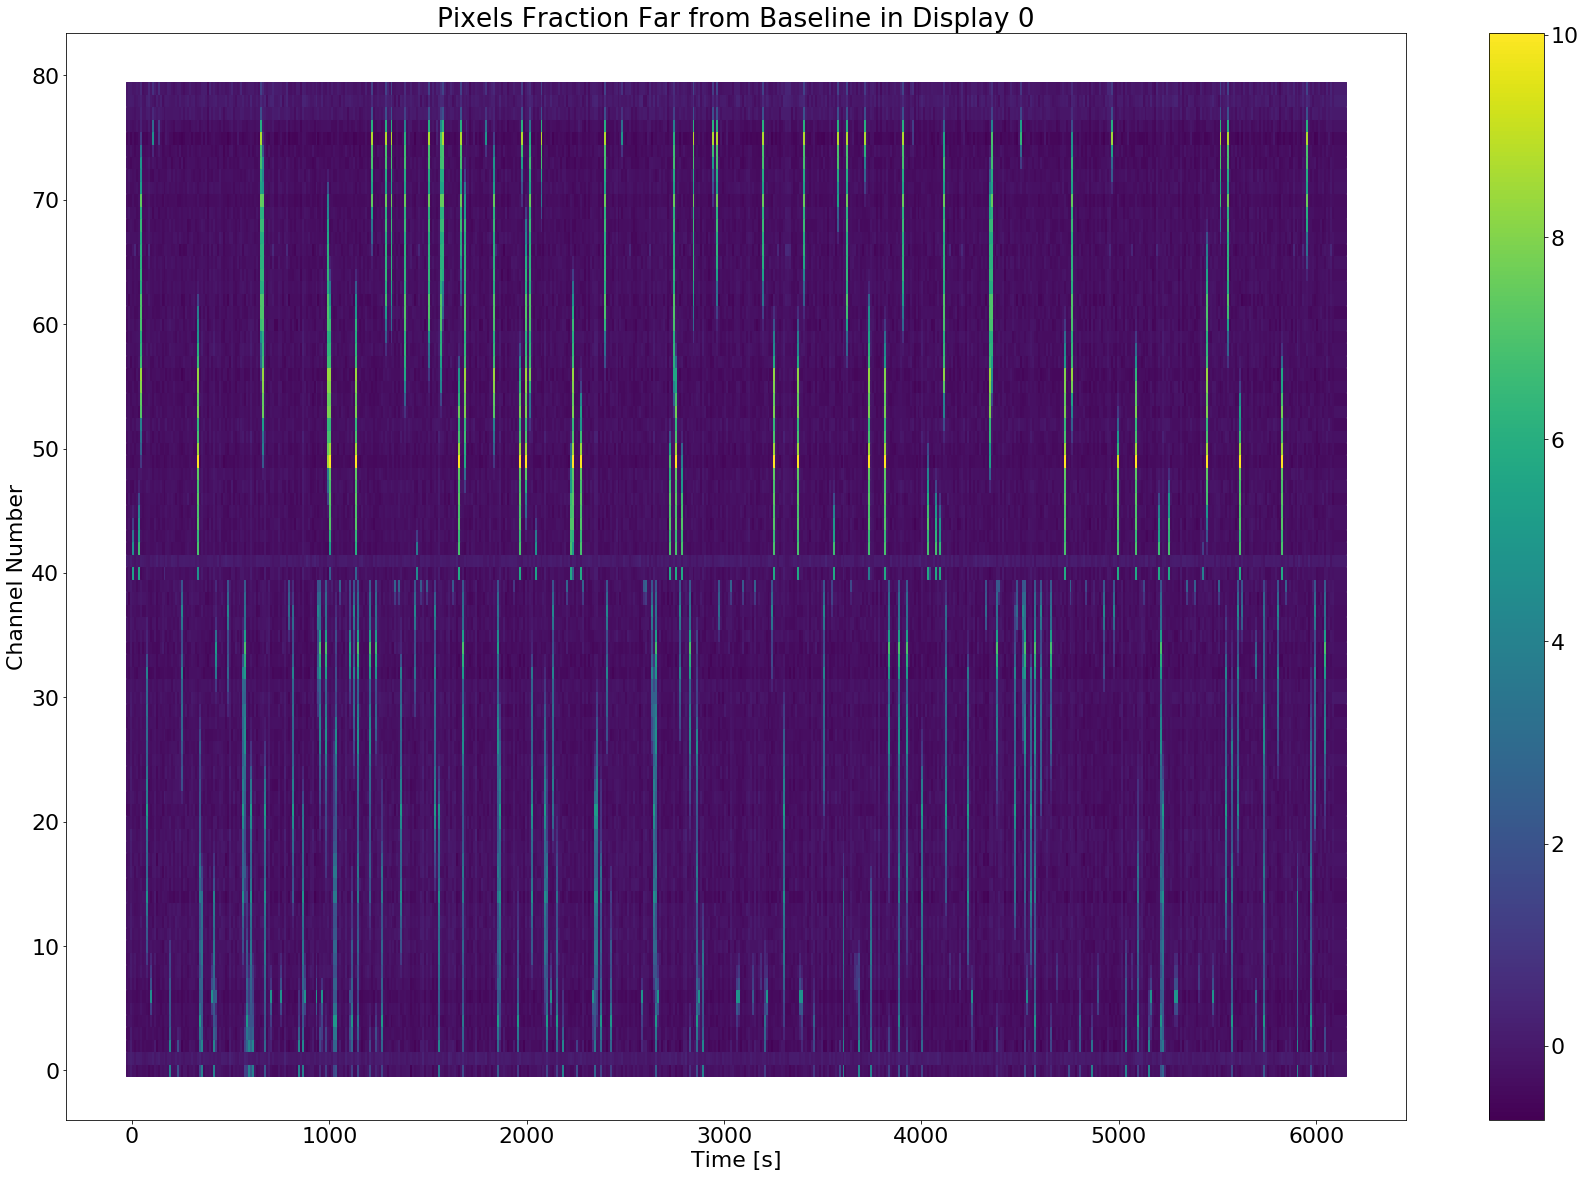

In [63]:
fig, ax = plt.subplots()
for i in range(faulty_0.shape[0]):
    sc=ax.scatter(time_0,channels_3d_0[i,:], c=channel_0_perc[i,:],vmin=np.amin(channel_0_perc),vmax=np.amax(channel_0_perc),marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=np.amin(channel_0_perc),vmax=np.amax(channel_0_perc))                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Pixels Fraction Far from Baseline in Display 0")
plt.show()

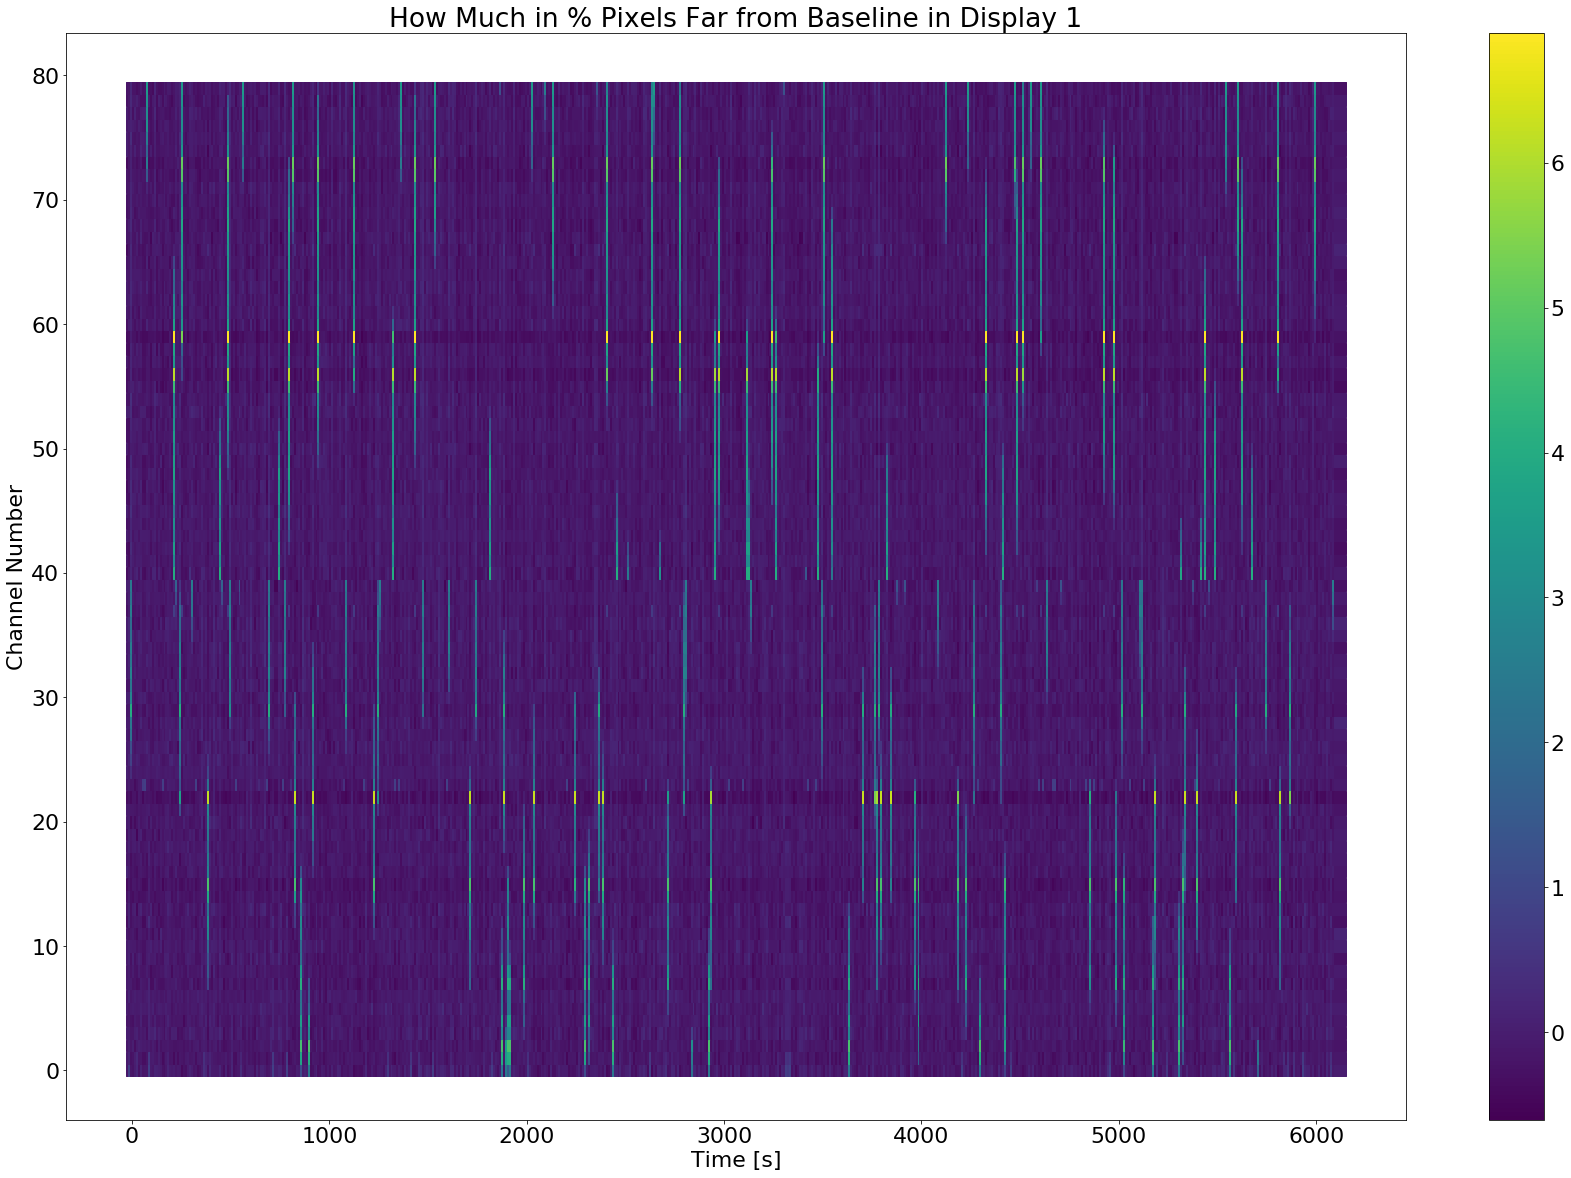

In [18]:
fig, ax = plt.subplots()
for i in range(faulty_1.shape[0]):
    sc=ax.scatter(time_1,channels_3d_1[i,:], c=channel_1_perc[i,:],vmin=np.amin(channel_1_perc),vmax=np.amax(channel_1_perc),marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=np.amin(channel_1_perc),vmax=np.amax(channel_1_perc))                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Pixels Fraction Far from Baseline in Display 1")
plt.show()

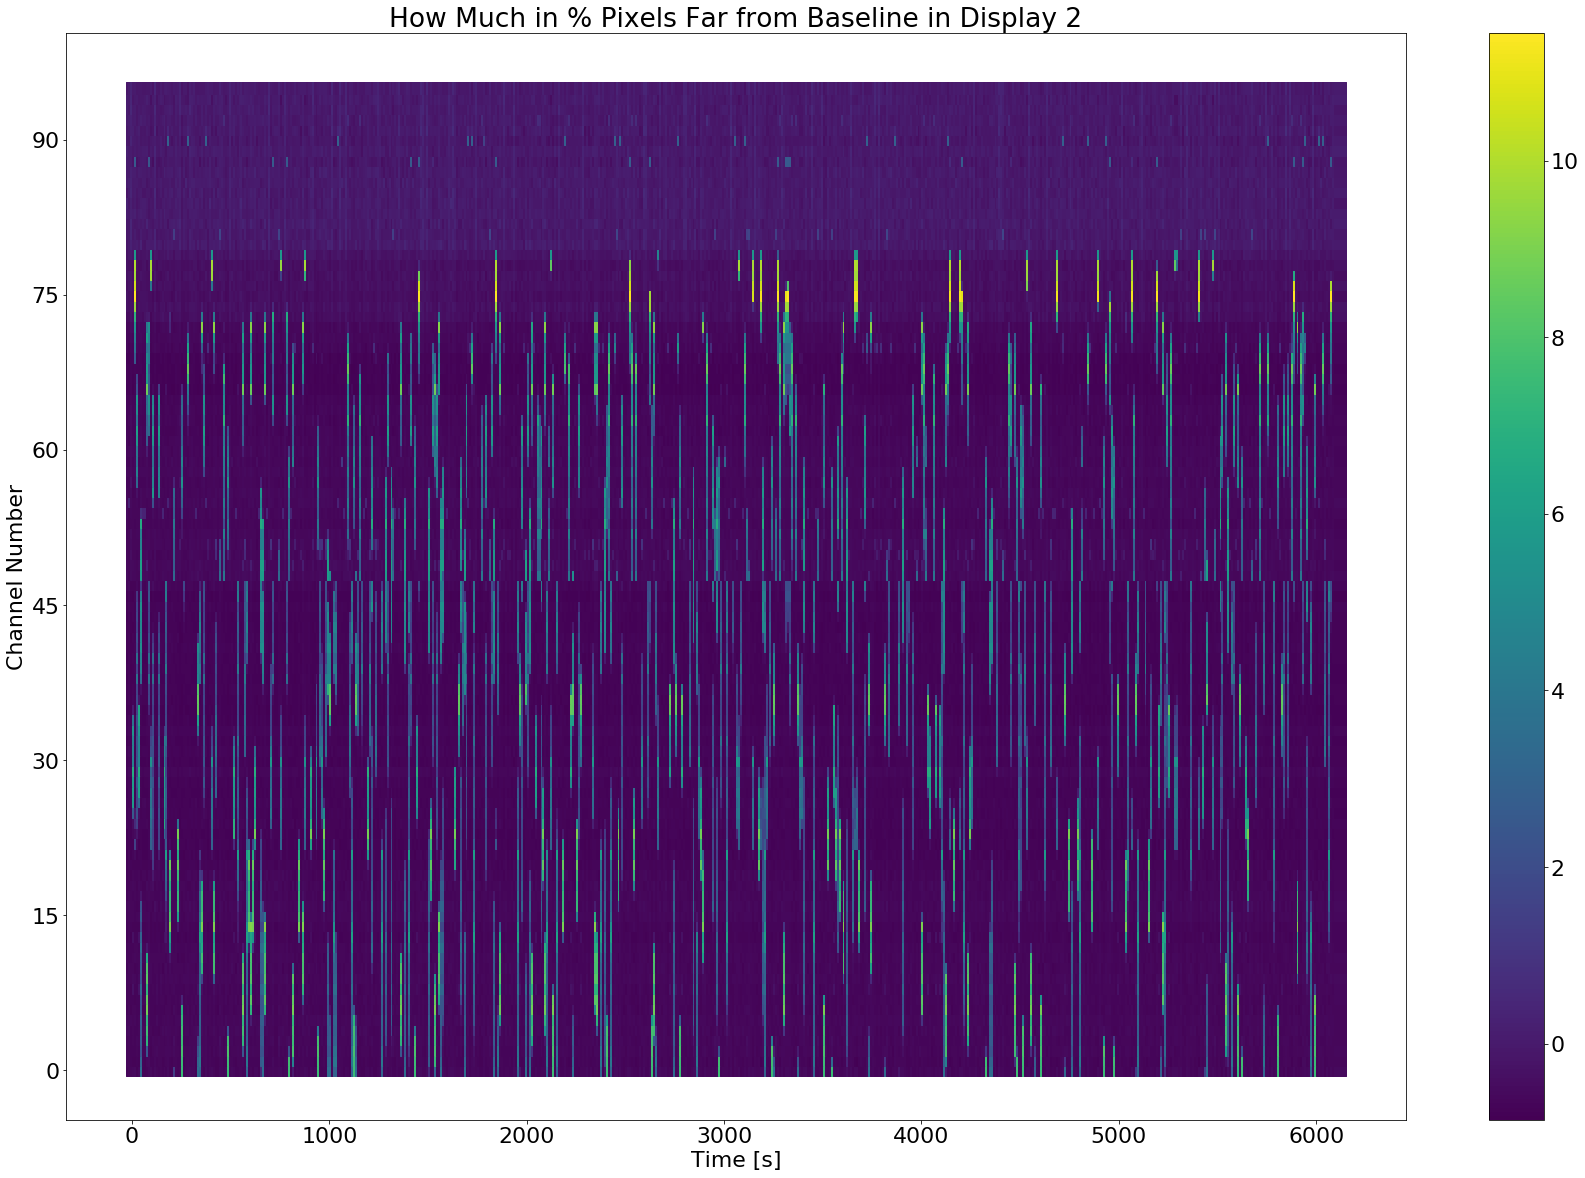

In [19]:
fig, ax = plt.subplots()
for i in range(faulty_2.shape[0]):
    sc=ax.scatter(time_2,channels_3d_2[i,:],c=channel_2_perc[i,:],vmin=np.amin(channel_2_perc),vmax=np.amax(channel_2_perc),marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=np.amin(channel_2_perc),vmax=np.amax(channel_2_perc))                              
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Pixels Fraction Far from Baseline in Display 2")
plt.show()

In [ ]:
#we noticed that display 2 has a strange behaviour
#let's investigate the waveform which produced the highest value from the baseline

In [20]:
np.amax(channel_2_perc)

11.452289196230378

In [21]:
np.unravel_index(channel_2_perc.argmax(), channel_2_perc.shape)

(75, 335)

In [22]:
path_dir_raw: str = r"/home/svergani/monitoring/files/raw_display_2/"

In [26]:
directory = os.fsencode(path_dir_raw)
counter = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if(counter==335):
        df = pd.read_hdf(os.sep.join([path_dir_raw, filename]))
        f = h5.File(os.sep.join([path_dir_raw, filename]), "r")
    counter = counter+1

In [38]:
channels = np.array(f.get('data/axis0').value)
timestamps = np.array(f.get('data/axis1').value)

In [80]:
channel_75_raw = []
for i in range(np.amax(timestamps)+1):
    channel_75_raw.append(df.iat[i,75])
    
channel_75_raw = np.array(channel_75_raw)

In [35]:
timestamps_seconds = np.array(timestamps*0.5)

In [39]:
channels[75]

4619

In [51]:
rmsm_2[335][75]

85.8841

In [66]:
rmsm_2.shape

(613, 96)

In [67]:
for i in range(613):
    print(rmsm_2[i][75])

5.04354
4.16736
5.12809
3.96566
85.2587
3.17623
4.11535
4.80611
4.91085
4.85166
4.42402
3.84107
3.81328
2.87503
4.26577
2.82115
3.00674
3.73859
4.73432
3.73486
4.05375
4.01246
3.68402
2.84446
3.52487
5.28618
4.04936
4.61142
3.30207
3.40141
3.68316
3.33565
3.83338
4.7279
3.99111
4.8811
4.01886
3.50224
3.74028
3.20759
4.08221
4.01262
5.47548
3.81328
3.7516
3.78998
2.9835
3.63507
5.28618
3.67146
2.85416
3.18658
5.04254
4.64184
3.98407
4.7904
4.05375
5.17932
5.78081
4.42402
4.08447
3.44431
3.47723
4.34574
3.55063
3.92259
3.84162
4.95575
4.60077
4.64867
4.34574
4.76697
5.30463
3.27319
4.12126
4.45114
4.45114
3.64394
3.12999
4.76697
5.1472
4.12126
3.36096
4.91444
4.06184
3.00537
5.07474
3.62402
4.55237
4.24741
3.02688
2.90089
4.22678
3.93548
4.30072
3.26738
3.1331
3.2064
3.96326
3.44863
3.93055
3.98343
4.51536
3.58564
4.34027
3.47903
3.8314
3.72776
4.71959
3.67991
4.91444
5.12372
3.89642
3.84985
3.44431
3.35637
3.82693
3.88178
3.57381
3.23448
4.8811
4.12769
3.74164
4.07454
3.60886
3.08846
3.

In [60]:
def rms(x):
  return np.sqrt(np.mean(x**2))

In [76]:
def standard(x):
    return np.std(x)

In [61]:
rms_channel_75 = rms(channel_75_raw)

In [81]:
std_channel_75 = np.std(channel_75_raw)

In [82]:
std_channel_75

85.34564923738057

Text(0.5,1,'ADC for Channel 4619 at 335th Measurement - RMSM is 85.8841 and Baseline is 6.9')

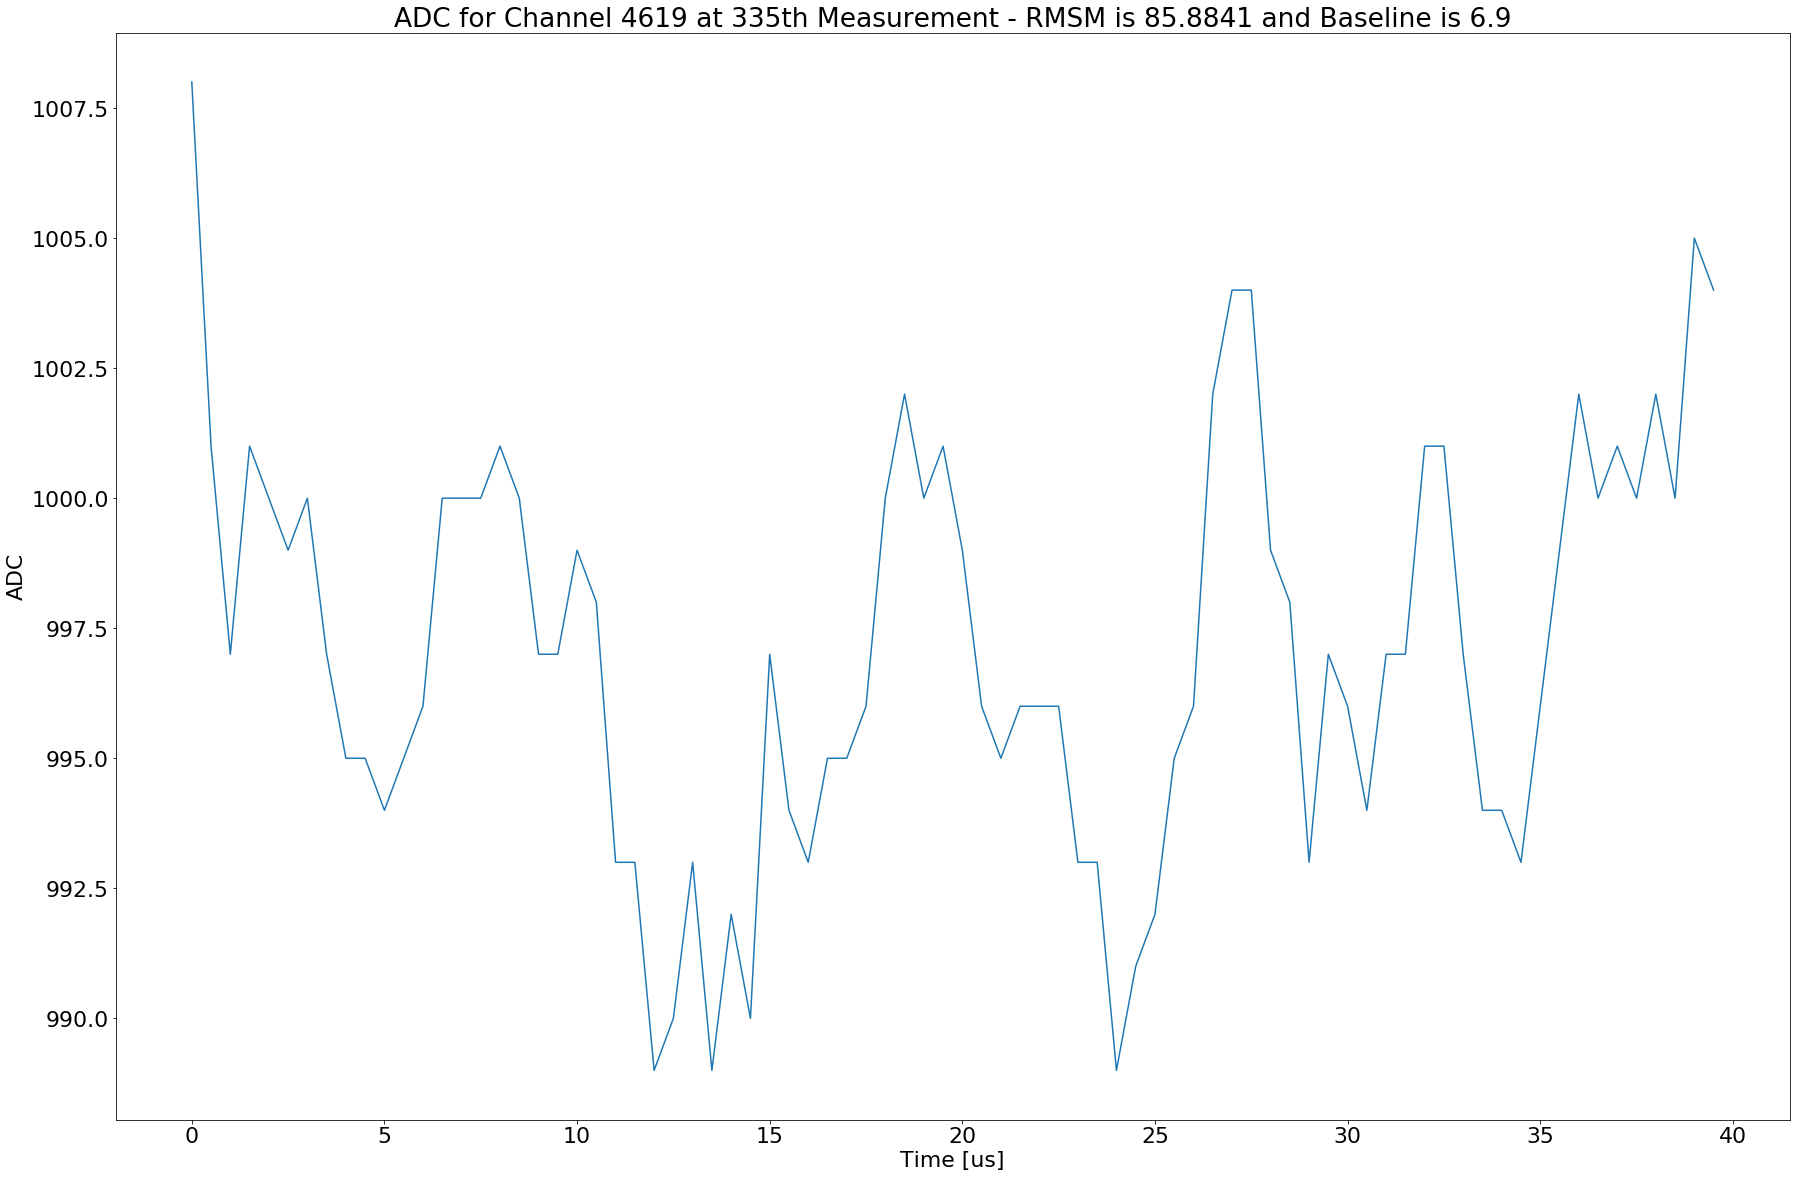

In [75]:
#Plot the first waveforms
fig, ax = plt.subplots()
ax.plot(timestamps_seconds,channel_75_raw,label="Input Pulse")
ax.set_xlabel("Time [us]")
ax.set_ylabel("ADC")
ax.set_title("ADC for Channel 4619 at 335th Measurement - RMSM is 85.8841 and Baseline is 6.9")